<a href="https://colab.research.google.com/github/arslonbeksaidov/dataset/blob/main/Gusto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ushbu ma'lumotlar to'plamidan E.V.Steyerbergning "Klinik bashorat qilish modellari" kitobidagi namunaviy ma'lumotlar to'plamidan foydalanilgan. Tavsif 411-betda keltirilgan:

O'tkir miokard infarkti (yurak xuruji) yurak mushagini qon bilan ta'minlaydigan koronar arteriyalardan birida tromb hosil bo'lishidan kelib chiqadi. O'tkir MI sog'liqni saqlashning asosiy muammosidir. Yoshga qarab kasalxonaga yotqizish darajasi
Qo'shma Shtatlarda miyokard infarkti 1000 ayolga 2 ta, erkaklar uchun esa 4 taga to'g'ri keladi. 350 O'lim voqea sodir bo'lgandan keyingi davrda, shuningdek, dastlabki infarktdan omon qolgan yillar davomida sezilarli. Ba'zi bemorlar kasalxonaga yetmasdan vafot etadi. Kasalxonaga yotqizilgan bemorlarning o'rtacha 30 kun ichida o'lim darajasi taxminan 6-15% ni tashkil qiladi.
30 kunlik o'lim xavfi turli prognostik omillarga kuchli bog'liq (22.1-jadval). Yosh bemorlarda xavflar keksa bemorlarga qaraganda ancha past. Bemorning boshqa demografik ma'lumotlari (jinsi, uzunligi, vazni), shuningdek, xavf omillarining mavjudligi (gipertenziya, diabet, chekish, oilaviy tarix) va oldingi yurak-qon tomir kasalliklari tarixi (oldingi MI, angina, insult, bypass operatsiyasi) ham muhimdir. . Tegishli taqdimot xususiyatlariga infarktning joylashuvi va EKG anormalliklari darajasi kiradi. Bemorning qon bosimi, yurak urish tezligi va chap qorincha funktsiyasi (Killip klassi, zarba mavjudligi) bilan aks ettirilgan o'tkir holati juda muhimdir.

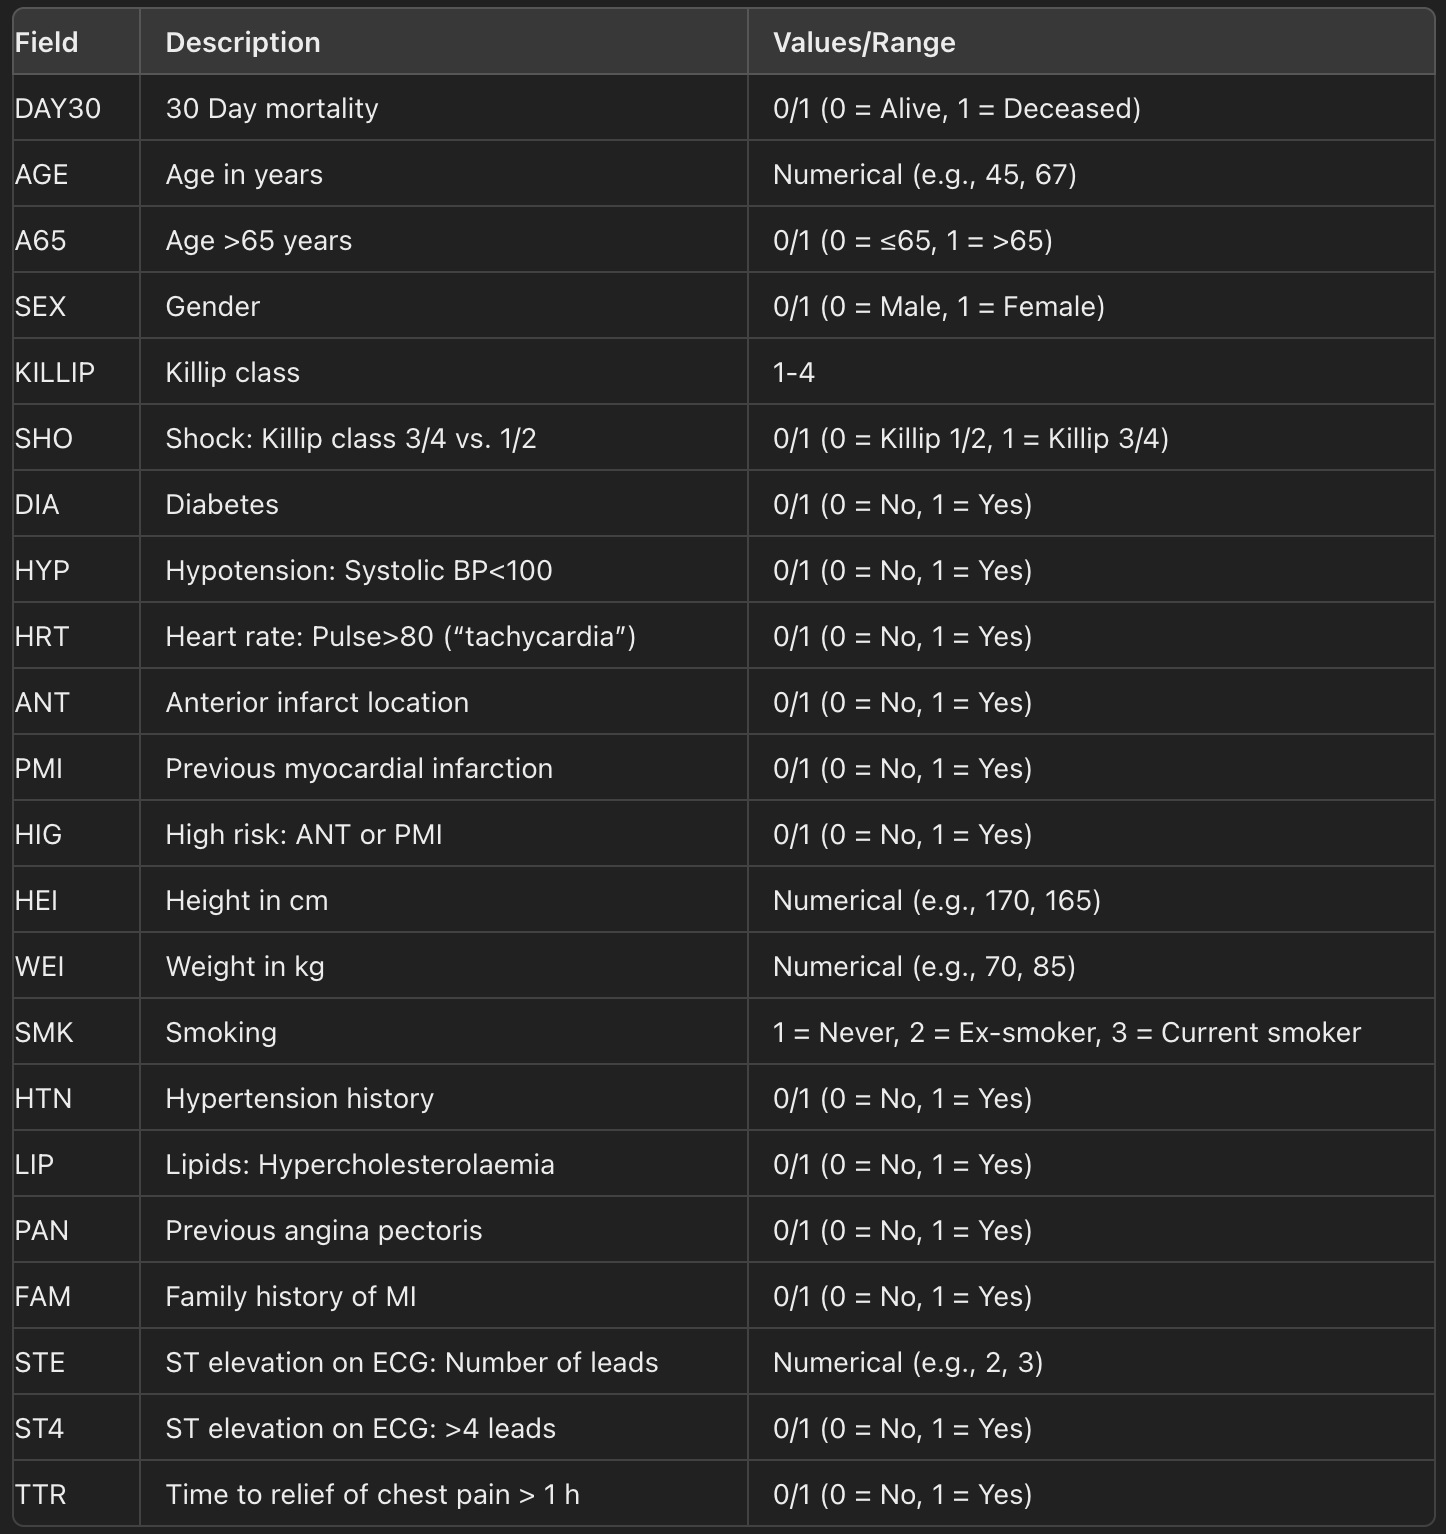

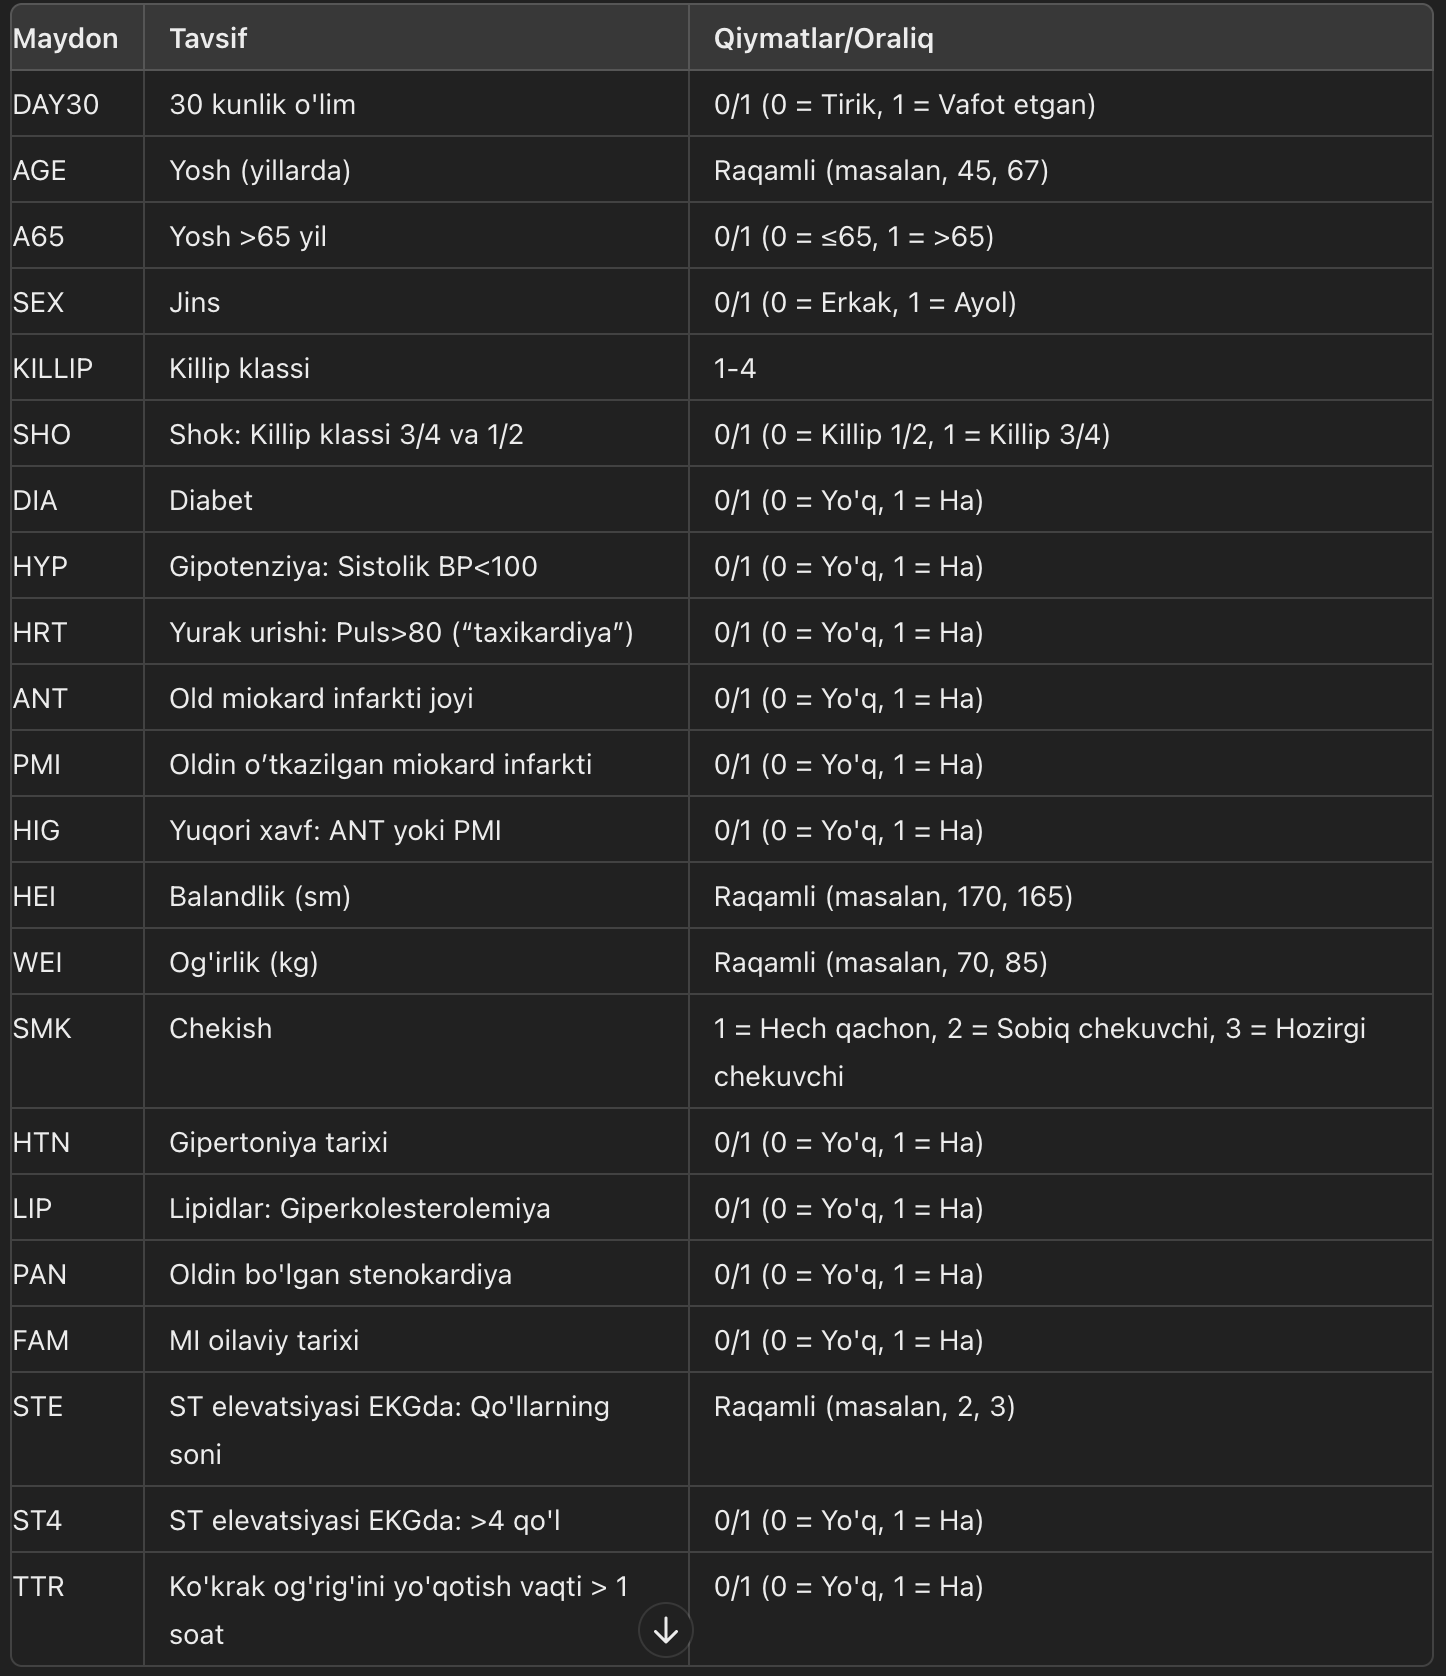

Killip klassi (Killip class) yurak yetishmovchiligini baholash uchun ishlatiladigan klinik tasniflash tizimidir. Bu sinflar miokard infarktidan keyin yurak yetishmovchiligining darajasini belgilashda yordam beradi. Killip klassi quyidagi toifalarga bo'linadi:

    Killip Class 1: Yurak yetishmovchiligi belgilarining yo'qligi.
    Killip Class 2: O'rtacha darajada yurak yetishmovchiligi (o'pka konjesiyasi yoki cheklangan yurak yetishmovchiligi).
    Killip Class 3: Og'ir darajada yurak yetishmovchiligi (og'ir o'pka konjesiyasi yoki o'pka shishi).
    Killip Class 4: Kardiogen shok (og'ir past qon bosimi va a'zolar perfuziyasining buzilishi bilan tavsiflanadi).

KILLIP parametri ushbu sinflardan birini (1 dan 4 gacha) o'z ichiga oladi va bemorning yurak yetishmovchiligining darajasini aniqlash uchun ishlatiladi.


SHO (Shok) parametri Killip klassi 3 yoki 4 bo'lgan bemorlarni 1 yoki 2 sinflarga nisbatan ajratib turadi. Bu parametr bemorning shok holatida ekanligini yoki yo'qligini aniqlashda yordam beradi.

SHO parametri quyidagicha bo'ladi:

    0: Bemor Killip klassi 1 yoki 2 (shok holati yo'q).
    1: Bemor Killip klassi 3 yoki 4 (shok holati mavjud).

Shunday qilib, SHO parametri bemorning shok holatida ekanligini aniqlash uchun ishlatiladi va bu yurak yetishmovchiligining og'irligini ko'rsatadi.

In [22]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
Path = "https://raw.githubusercontent.com/arslonbeksaidov/dataset/main/full_data_set_gusto.csv"
training_df = pd.read_csv(Path)
training_df = training_df.drop(['DAY30_Probability'], axis=1)
training_df.head()


,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
0,0,0,70.313,1,1,0,0,0,0,1,...,177.3,84.0,1,3,1,0,0,1,0,1
1,0,0,59.844,0,1,0,1,0,0,1,...,172.0,115.0,1,1,0,0,1,6,1,0
2,0,0,59.023,0,1,0,0,0,1,0,...,170.0,76.0,1,1,0,0,1,3,0,0
3,1,1,80.375,1,1,0,0,0,1,0,...,154.9,50.0,0,3,0,0,0,3,0,0
4,0,0,64.750,0,1,0,0,1,0,0,...,167.0,97.4,0,1,0,1,1,2,0,1


In [46]:
training_df.describe()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,...,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,0.047031,0.253086,60.709086,0.388889,1.162551,0.017637,0.133157,0.087596,0.320400,0.366843,...,171.436626,81.099588,0.395650,1.881540,0.393592,0.345091,0.461787,4.063492,0.369782,0.584950
std,0.211737,0.434844,11.804942,0.487570,0.438888,0.131646,0.339794,0.282747,0.466699,0.482014,...,9.962508,17.360092,0.489062,0.812874,0.488618,0.475468,0.498611,1.874031,0.482817,0.492803
min,0.000000,0.000000,23.910000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,140.900000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,51.478750,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,165.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,61.078000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,172.600000,80.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
75%,0.000000,1.000000,69.949250,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,178.000000,90.300000,1.000000,3.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000
max,1.000000,1.000000,89.484000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,205.700000,180.000000,1.000000,3.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000


In [47]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DAY30   3402 non-null   int64  
 1   SEX     3402 non-null   int64  
 2   AGE     3402 non-null   float64
 3   A65     3402 non-null   int64  
 4   KILLIP  3402 non-null   int64  
 5   SHO     3402 non-null   int64  
 6   DIA     3402 non-null   int64  
 7   HYP     3402 non-null   int64  
 8   HRT     3402 non-null   int64  
 9   ANT     3402 non-null   int64  
 10  PMI     3402 non-null   int64  
 11  HEI     3402 non-null   float64
 12  WEI     3402 non-null   float64
 13  HTN     3402 non-null   int64  
 14  SMK     3402 non-null   int64  
 15  LIP     3402 non-null   int64  
 16  PAN     3402 non-null   int64  
 17  FAM     3402 non-null   int64  
 18  STE     3402 non-null   int64  
 19  ST4     3402 non-null   int64  
 20  TTR     3402 non-null   int64  
dtypes: float64(3), int64(18)
memory usage

In [48]:
training_df.shape #eni va bo'yi

(3402, 21)

In [49]:
 training_df.corr() #umumiy jadval ko'rinishida correlyatsiyani ko'rish

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
DAY30,1.000000,0.094227,0.218592,0.181648,0.268919,0.307784,0.035534,0.107974,0.103357,0.110356,...,-0.084980,-0.100376,0.013334,0.063129,-0.011296,0.069468,-0.016393,0.085098,0.074305,0.034964
SEX,0.094227,1.000000,0.240957,0.226284,0.033961,-0.006087,0.046469,0.063565,0.053804,-0.004001,...,-0.682185,-0.387029,0.138738,0.100647,0.038910,0.039644,0.012749,0.016357,0.030275,-0.044788
AGE,0.218592,0.240957,1.000000,0.814204,0.150548,0.069999,0.037323,0.015698,-0.035124,0.045917,...,-0.238432,-0.302688,0.162120,0.351928,-0.069683,0.102269,-0.166453,0.016801,0.037343,-0.017745
A65,0.181648,0.226284,0.814204,1.000000,0.138703,0.067186,0.021001,-0.004029,-0.010194,0.048376,...,-0.218931,-0.281154,0.143723,0.304706,-0.049025,0.076664,-0.117251,0.028318,0.039692,-0.012101
KILLIP,0.268919,0.033961,0.150548,0.138703,1.000000,0.652647,0.038179,0.062931,0.134677,0.114160,...,-0.089502,-0.043646,0.045487,0.001243,-0.022838,0.049548,-0.012587,0.063236,0.038173,0.017024
SHO,0.307784,-0.006087,0.069999,0.067186,0.652647,1.000000,0.046081,0.061174,0.109000,0.097258,...,-0.016590,0.014361,0.042294,0.008539,0.001757,0.010778,-0.007647,0.040749,0.017639,0.035818
DIA,0.035534,0.046469,0.037323,0.021001,0.038179,0.046081,1.000000,0.019339,0.094299,0.040967,...,-0.050941,0.118447,0.118141,0.059254,0.013641,0.063104,0.003142,0.031047,0.020590,0.028126
HYP,0.107974,0.063565,0.015698,-0.004029,0.062931,0.061174,0.019339,1.000000,-0.072371,-0.054624,...,-0.031410,-0.046279,-0.027437,-0.046949,0.003638,-0.012767,-0.011706,-0.032695,-0.030574,0.049980
HRT,0.103357,0.053804,-0.035124,-0.010194,0.134677,0.109000,0.094299,-0.072371,1.000000,0.133505,...,-0.034195,0.060616,0.048620,-0.036334,-0.012914,0.036904,0.018514,0.108855,0.097785,0.038871
ANT,0.110356,-0.004001,0.045917,0.048376,0.114160,0.097258,0.040967,-0.054624,0.133505,1.000000,...,-0.006087,-0.025925,-0.022165,0.078673,-0.030216,-0.013694,-0.044423,0.510639,0.476960,0.025973


In [50]:
training_df.corrwith(training_df['DAY30']).sort_values(ascending=False)

DAY30     1.000000
SHO       0.307784
KILLIP    0.268919
AGE       0.218592
A65       0.181648
ANT       0.110356
HYP       0.107974
HRT       0.103357
SEX       0.094227
PMI       0.091276
STE       0.085098
ST4       0.074305
PAN       0.069468
SMK       0.063129
DIA       0.035534
TTR       0.034964
HTN       0.013334
LIP      -0.011296
FAM      -0.016393
HEI      -0.084980
WEI      -0.100376
dtype: float64

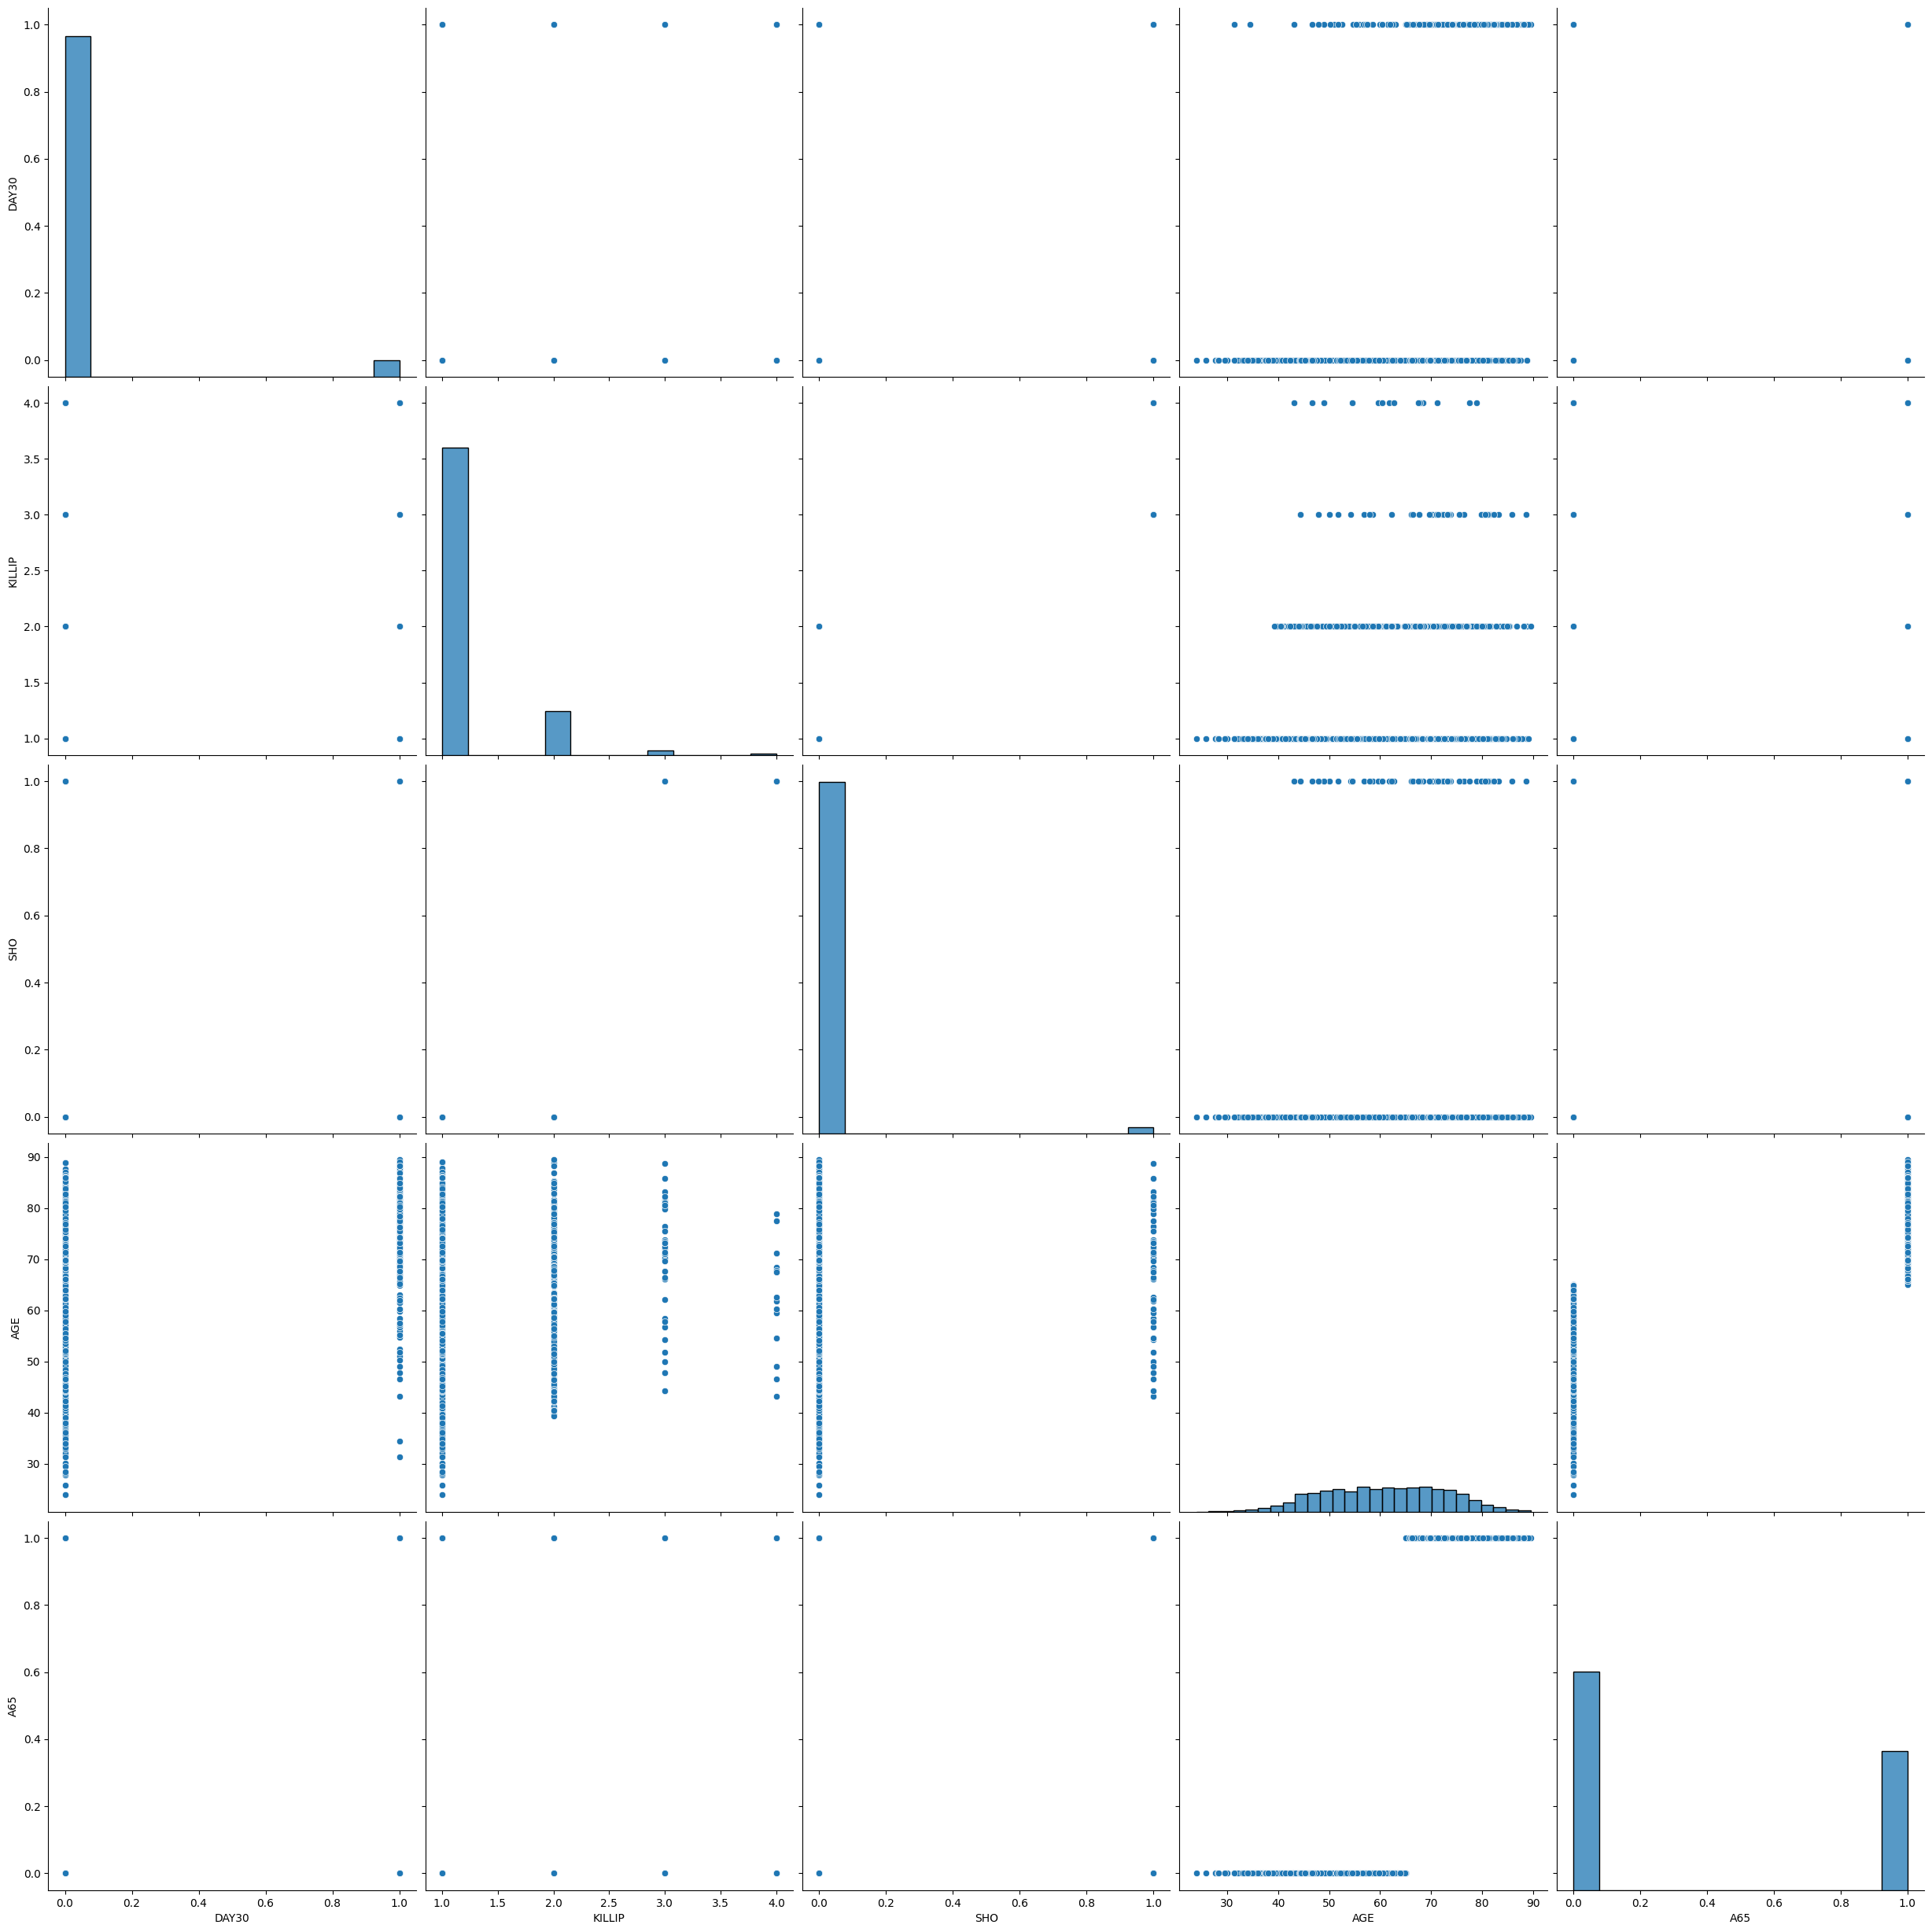

In [51]:
cols = ['DAY30','KILLIP','SHO','AGE','A65']
sns.pairplot(training_df[cols], height=5)
plt.show()

In [52]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(training_df,training_df['SEX']):
    strat_train_set = training_df.loc[train_index]
    strat_test_set = training_df.loc[test_index]

In [53]:
strat_train_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
3165,0,0,70.969,1,2,0,0,0,1,0,...,167.0,88.2,1,3,0,0,0,6,1,1
2511,0,0,57.109,0,1,0,0,0,0,1,...,185.0,83.0,0,1,0,0,0,5,1,0
2964,0,1,78.500,1,1,0,1,1,1,0,...,150.8,60.0,1,3,0,0,0,4,0,0
2478,0,0,47.625,0,1,0,0,0,0,0,...,160.0,75.0,0,1,0,0,0,3,0,0
1897,0,0,46.992,0,1,0,0,0,0,0,...,180.3,89.0,0,1,1,1,0,3,0,1


In [54]:
strat_test_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
2370,0,1,78.609,1,2,0,0,0,0,1,...,163.0,60.0,0,3,1,0,1,4,0,1
1527,0,0,59.125,0,1,0,1,0,1,0,...,170.0,107.0,0,3,0,1,0,5,1,1
2663,0,0,56.289,0,1,0,0,0,0,0,...,164.0,85.0,0,3,1,1,0,4,0,0
1790,0,0,56.492,0,1,0,1,0,0,1,...,170.0,99.0,0,3,0,0,0,7,1,1
3379,0,0,75.797,1,1,0,0,0,0,0,...,176.0,72.3,0,2,1,0,0,5,1,1


In [55]:
x_test = strat_test_set.drop("DAY30", axis=1)
y_test = strat_test_set["DAY30"].copy()

In [56]:
x_test

,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,PMI,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
2370,1,78.609,1,2,0,0,0,0,1,0,163.0,60.0,0,3,1,0,1,4,0,1
1527,0,59.125,0,1,0,1,0,1,0,1,170.0,107.0,0,3,0,1,0,5,1,1
2663,0,56.289,0,1,0,0,0,0,0,0,164.0,85.0,0,3,1,1,0,4,0,0
1790,0,56.492,0,1,0,1,0,0,1,0,170.0,99.0,0,3,0,0,0,7,1,1
3379,0,75.797,1,1,0,0,0,0,0,0,176.0,72.3,0,2,1,0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0,59.133,0,1,0,0,0,0,0,1,177.0,60.0,0,2,1,1,1,3,0,1
1129,0,65.828,1,1,0,1,0,0,0,1,180.3,80.4,1,1,0,0,1,2,0,1
1017,0,74.453,1,1,0,0,0,0,0,1,173.0,78.6,1,3,1,0,1,8,1,1
561,0,54.758,0,2,0,0,0,0,0,0,183.0,94.4,0,1,0,0,1,4,0,0


In [60]:
y_test

2370    0
1527    0
2663    0
1790    0
3379    0
       ..
3254    0
1129    0
1017    0
561     0
1225    0
Name: DAY30, Length: 681, dtype: int64

In [61]:
x_train = strat_train_set.drop("DAY30", axis=1)
y_train = strat_train_set["DAY30"].copy()

In [62]:
x_train

,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,PMI,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
3165,0,70.969,1,2,0,0,0,1,0,0,167.0,88.2,1,3,0,0,0,6,1,1
2511,0,57.109,0,1,0,0,0,0,1,0,185.0,83.0,0,1,0,0,0,5,1,0
2964,1,78.500,1,1,0,1,1,1,0,0,150.8,60.0,1,3,0,0,0,4,0,0
2478,0,47.625,0,1,0,0,0,0,0,1,160.0,75.0,0,1,0,0,0,3,0,0
1897,0,46.992,0,1,0,0,0,0,0,1,180.3,89.0,0,1,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,0,72.063,1,1,0,0,0,0,0,0,167.6,76.0,0,3,0,0,0,2,0,0
294,0,57.344,0,1,0,0,0,0,1,0,167.6,86.0,0,3,0,0,0,3,0,1
1693,1,58.563,0,1,0,0,0,0,0,0,175.0,77.3,1,3,1,1,1,5,1,1
1598,0,60.938,0,1,0,0,1,0,0,1,170.0,63.0,1,1,0,1,1,3,0,0


In [63]:
y_train

3165    0
2511    0
2964    0
2478    0
1897    0
       ..
2135    0
294     0
1693    0
1598    0
2710    0
Name: DAY30, Length: 2721, dtype: int64

***Logistic Regression***

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class


In [67]:
strat_test_set['DAY30_PRED'] = y_pred
strat_test_set['DAY30_PROB'] = y_prob
strat_test_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR,DAY30_PRED,DAY30_PROB
2370,0,1,78.609,1,2,0,0,0,0,1,...,0,3,1,0,1,4,0,1,0,0.233080
1527,0,0,59.125,0,1,0,1,0,1,0,...,0,3,0,1,0,5,1,1,0,0.021908
2663,0,0,56.289,0,1,0,0,0,0,0,...,0,3,1,1,0,4,0,0,0,0.003309
1790,0,0,56.492,0,1,0,1,0,0,1,...,0,3,0,0,0,7,1,1,0,0.008184
3379,0,0,75.797,1,1,0,0,0,0,0,...,0,2,1,0,0,5,1,1,0,0.044025


In [68]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [71]:
print(accuracy)
print(conf_matrix)
print(class_report)

0.9574155653450808
[[647   1]
 [ 28   5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       648
           1       0.83      0.15      0.26        33

    accuracy                           0.96       681
   macro avg       0.90      0.57      0.62       681
weighted avg       0.95      0.96      0.94       681



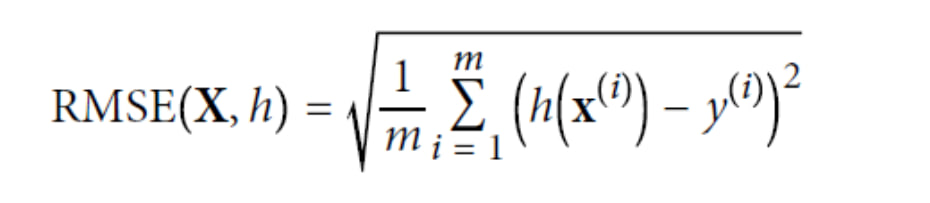

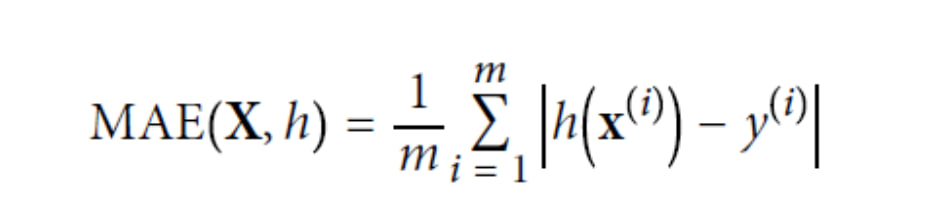

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# RMSE hisoblaymiz
mse = np.sqrt(mse)
print(mse)
# MSE hisoblaymiz
print(mae)

0.20635996378881064
0.042584434654919234


***RandomForest***

In [74]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
y_predicted = RF_model.predict(x_test)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.20250711896114654


**DecisionTree**

In [83]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [84]:
y_predicted = Tree_model.predict(x_test)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.25055005567047034


***Cross-validation***

In [77]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [78]:
from sklearn.model_selection import cross_val_score

**neg_mean_squared_error** with cros validation

In [80]:
scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)

In [81]:
display_scores(LR_rmse_scores)

Scores: [0.20091534 0.20109992 0.18190172 0.21437323 0.20561958]
Mean: 0.20078195672756366
Std.dev: 0.010627395002265349


**Random Forest with cross validation**

In [82]:
scores = cross_val_score(RF_model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
RF_rmse_scores = np.sqrt(-scores)
display_scores(RF_rmse_scores)

Scores: [0.19947793 0.20655275 0.18102008 0.22326767 0.18887861]
Mean: 0.19983940996878255
Std.dev: 0.014617725168244238


**Decision Tree with cross validation**

In [85]:
scores = cross_val_score(Tree_model, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [0.29183015 0.24815496 0.27285258 0.29079    0.24442309 0.25724788
 0.26775208 0.27785947 0.24629609 0.22071075]
Mean: 0.261791703648144
Std.dev: 0.02143661806247577


**Modelni saqlash (pickle yordamida saqlash)**

In [86]:
import pickle

filename = 'Logistic_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [87]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [88]:
scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [0.20091534 0.20109992 0.18190172 0.21437323 0.20561958]
Mean: 0.20078195672756366
Std.dev: 0.010627395002265349
